In [1377]:
!pip install prophet

In [1378]:
#import dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt

In [1379]:
# # upload US-Monthly-GDP-History-Data.csv
# from google.colab import files
# uploaded = files.upload()

In [1380]:
# for reading in the US-Monthly-GDP-History-Data.csv in jupyter notebook 
# comment out when not in use
df= pd.read_csv('resources/GDPC1.csv', parse_dates= True)
display(df.head(15))
display(df.tail(20))

,DATE,GDPC1
0,1947-01-01,2182.681
1,1947-04-01,2176.892
2,1947-07-01,2172.432
3,1947-10-01,2206.452
4,1948-01-01,2239.682
5,1948-04-01,2276.690
6,1948-07-01,2289.770
7,1948-10-01,2292.364
8,1949-01-01,2260.807
9,1949-04-01,2253.128


,DATE,GDPC1
290,2019-07-01,20843.322
291,2019-10-01,20985.448
292,2020-01-01,20693.238
293,2020-04-01,19056.617
294,2020-07-01,20548.793
295,2020-10-01,20771.691
296,2021-01-01,21058.379
297,2021-04-01,21389.005
298,2021-07-01,21571.421
299,2021-10-01,21960.388


In [1381]:
# drop empty columns and rows
# use .info() to learn more about the dataframe
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    310 non-null    object 
 1   GDPC1   310 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB


In [1382]:
# convert to date to datetime
# set index to 'Date'
# take years only up until 2015

try:
    df['DATE'] = pd.to_datetime(df['DATE'], errors = 'coerce')
except Exception as e:
    print(e)

df = df.dropna(subset=['DATE'])
gdp_df= df.set_index('DATE')

gdp_df = gdp_df.loc['1988':'2015']
gdp_df

,GDPC1
DATE,
1988-01-01,9367.502
1988-04-01,9490.594
1988-07-01,9546.206
1988-10-01,9673.405
1989-01-01,9771.725
...,...
2014-10-01,18500.031
2015-01-01,18666.621
2015-04-01,18782.243


<Axes: xlabel='DATE'>

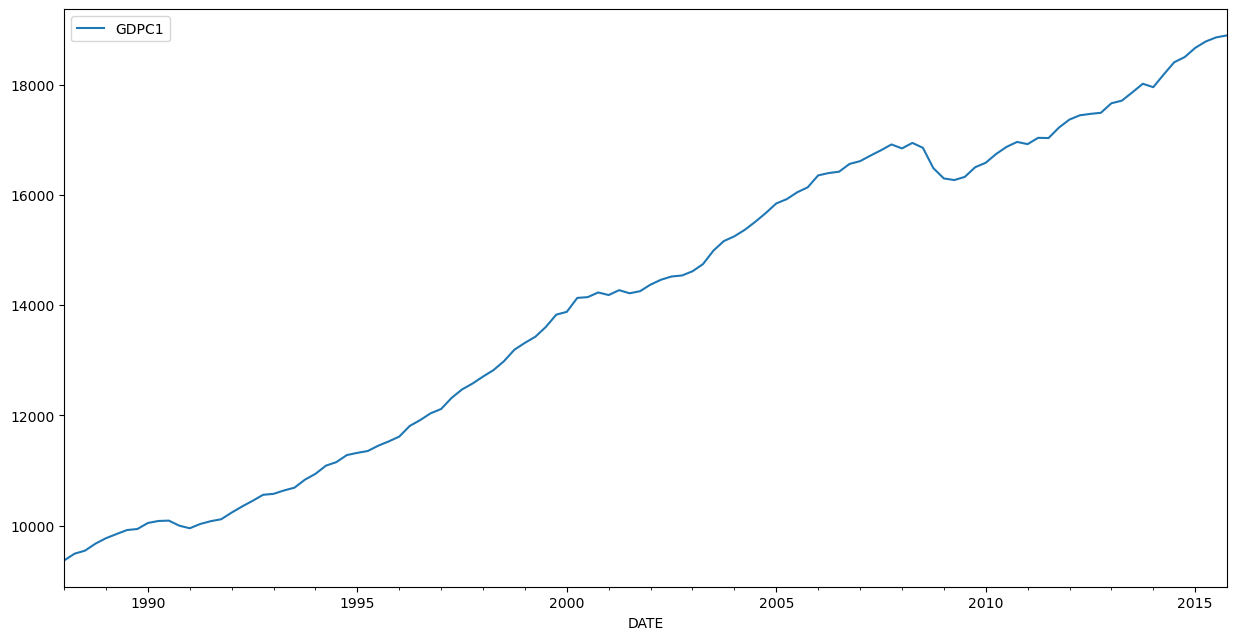

In [1383]:
# visualize the dataframe
gdp_df.plot(figsize=(15, 7.5))

<Axes: xlabel='DATE'>

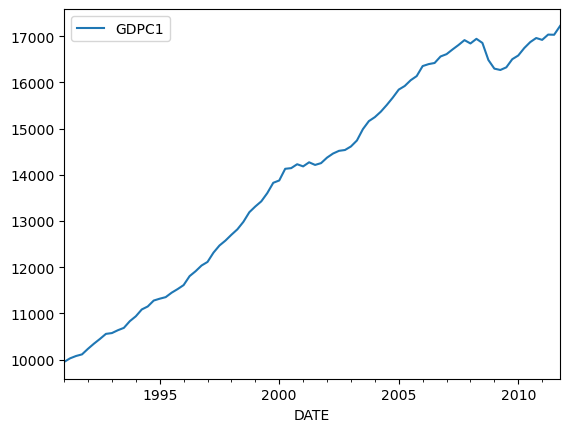

In [1384]:
# visualize GDP from 1991 to 10 years after 9/11
gdp_df.loc['1991':'2011'].plot()


In [1385]:
# reset index for gdp_df to prepare for prophet
gdp_rs_index_df = gdp_df.reset_index()
gdp_rs_index_df

,DATE,GDPC1
0,1988-01-01,9367.502
1,1988-04-01,9490.594
2,1988-07-01,9546.206
3,1988-10-01,9673.405
4,1989-01-01,9771.725
...,...,...
107,2014-10-01,18500.031
108,2015-01-01,18666.621
109,2015-04-01,18782.243
110,2015-07-01,18857.418


In [1386]:
# slice gdp_rs_index_df up until 2001-09
# rename columns to 'ds', 'y'
nine_eleven_gdp_df = gdp_rs_index_df.loc[gdp_rs_index_df['DATE'] < '2001-09']
nine_eleven_gdp_df.columns = ['ds', 'y']
nine_eleven_gdp_df.head()

,ds,y
0,1988-01-01,9367.502
1,1988-04-01,9490.594
2,1988-07-01,9546.206
3,1988-10-01,9673.405
4,1989-01-01,9771.725


In [1387]:
# # Call the Prophet function, store as an object
model_9_11 = Prophet()
model_9_11

In [1388]:
# fit the Prophet model
model_9_11.fit(nine_eleven_gdp_df)

14:14:15 - cmdstanpy - INFO - Chain [1] start processing
14:14:16 - cmdstanpy - INFO - Chain [1] done processing


In [1389]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 3 years
future_9_11 = model_9_11.make_future_dataframe(periods=3, freq= 'Y')

# View the last five rows of the predictions
future_9_11.tail()



c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


,ds
53,2001-04-01
54,2001-07-01
55,2001-12-31
56,2002-12-31
57,2003-12-31


In [1390]:

# Make the predictions for the trend data using the future_trends DataFrame
forecast_9_11 = model_9_11.predict(future_9_11)

# Display the first five rows of the forecast DataFrame
forecast_9_11.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1988-01-01,46962.721710,9274.539173,9369.559135,46962.721710,46962.721710,-37639.725163,-37639.725163,-37639.725163,-37639.725163,-37639.725163,-37639.725163,0.0,0.0,0.0,9322.996547
1,1988-04-01,47079.526274,9488.802530,9581.744936,47079.526274,47079.526274,-37542.089011,-37542.089011,-37542.089011,-37542.089011,-37542.089011,-37542.089011,0.0,0.0,0.0,9537.437262
2,1988-07-01,47196.330837,9548.263636,9643.576181,47196.330837,47196.330837,-37600.513506,-37600.513506,-37600.513506,-37600.513506,-37600.513506,-37600.513506,0.0,0.0,0.0,9595.817331
3,1988-10-01,47314.418967,9652.766180,9744.992625,47314.418967,47314.418967,-37616.863245,-37616.863245,-37616.863245,-37616.863245,-37616.863245,-37616.863245,0.0,0.0,0.0,9697.555722
4,1989-01-01,47432.507097,9683.351859,9776.076764,47432.507097,47432.507097,-37701.021868,-37701.021868,-37701.021868,-37701.021868,-37701.021868,-37701.021868,0.0,0.0,0.0,9731.485229


c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


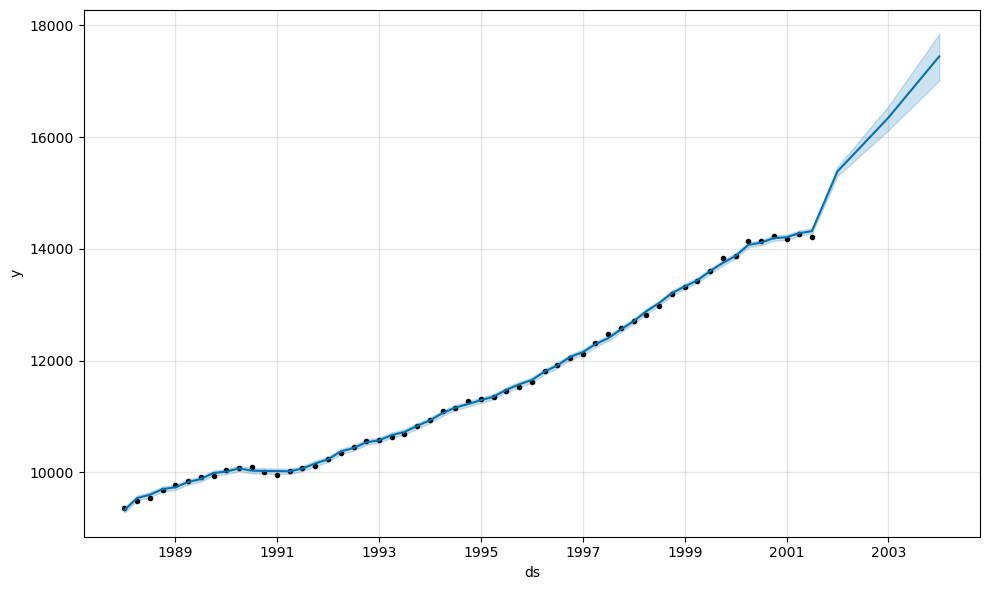

In [1391]:
# Plot the Prophet predictions for the 9/11 trends data
# slice the forecast_9_11 trends to start from 1991 for better presentation
model_9_11.plot(forecast_9_11)
forecast_9_11 = forecast_9_11.loc[forecast_9_11['ds'] >= '1991']

c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain

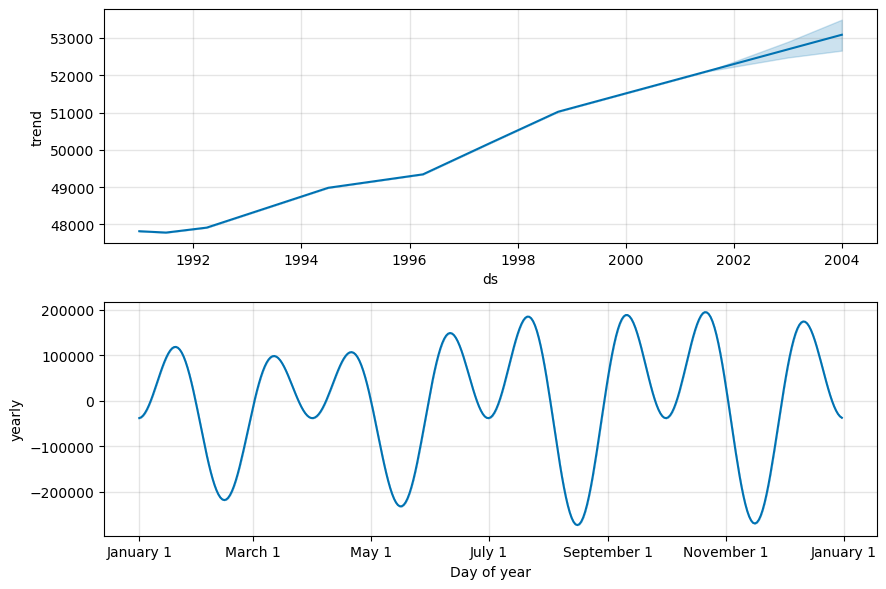

In [1392]:
# Use the plot_components function to visualize the forecast results
figure = model_9_11.plot_components(forecast_9_11)

<Axes: xlabel='ds'>

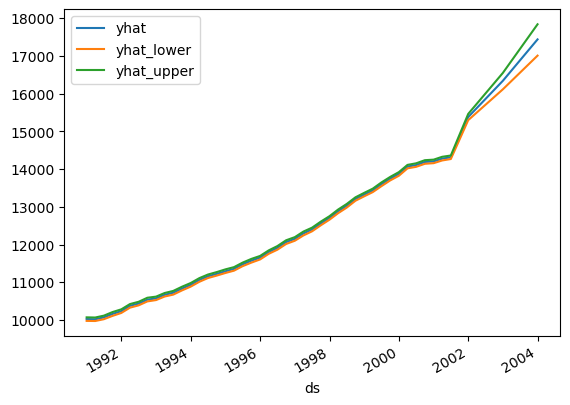

In [1393]:
# set 'ds' as index
# From the `forecast_9_11` DataFrame, plot to visualize
# the yhat, yhat_lower, and yhat_upper columns
forecast_9_11 = forecast_9_11.set_index('ds')
forecast_9_11[['yhat', 'yhat_lower', 'yhat_upper']].plot()

<Axes: xlabel='DATE'>

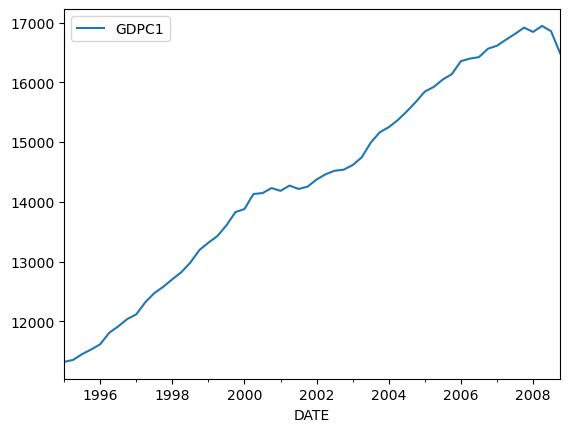

In [1394]:
# create a df for hurricane Katrina
gdp_df.loc['1995':'2008'].plot()


In [1395]:
# slice gdp_rs_index_df from 1992 to 2005-08
# rename columns to 'ds', 'y'
katrina_gdp_df = gdp_rs_index_df.loc[gdp_rs_index_df['DATE'] < '2005-08']
katrina_gdp_df.columns = ['ds', 'y']
katrina_gdp_df.head()

,ds,y
0,1988-01-01,9367.502
1,1988-04-01,9490.594
2,1988-07-01,9546.206
3,1988-10-01,9673.405
4,1989-01-01,9771.725


In [1396]:
# # Call the Prophet function, store as an object
model_katrina = Prophet()
model_katrina

In [1397]:
# # fit the Prophet model
model_katrina.fit(katrina_gdp_df)

14:14:18 - cmdstanpy - INFO - Chain [1] start processing
14:14:19 - cmdstanpy - INFO - Chain [1] done processing


In [1398]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 3 years
future_katrina = model_katrina.make_future_dataframe(periods=3, freq='Y')

# View the last five rows of the predictions
future_katrina.tail()



c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


,ds
69,2005-04-01
70,2005-07-01
71,2005-12-31
72,2006-12-31
73,2007-12-31


In [1399]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_katrina = model_katrina.predict(future_katrina)

# Display the first five rows of the forecast DataFrame
forecast_katrina.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1988-01-01,2499.491913,9274.927214,9382.715704,2499.491913,2499.491913,6829.088365,6829.088365,6829.088365,6829.088365,6829.088365,6829.088365,0.0,0.0,0.0,9328.580279
1,1988-04-01,2578.790071,9448.222134,9554.731036,2578.790071,2578.790071,6922.673722,6922.673722,6922.673722,6922.673722,6922.673722,6922.673722,0.0,0.0,0.0,9501.463794
2,1988-07-01,2658.088229,9540.068432,9642.408052,2658.088229,2658.088229,6931.696176,6931.696176,6931.696176,6931.696176,6931.696176,6931.696176,0.0,0.0,0.0,9589.784406
3,1988-10-01,2738.257915,9658.720895,9766.879882,2738.257915,2738.257915,6973.162572,6973.162572,6973.162572,6973.162572,6973.162572,6973.162572,0.0,0.0,0.0,9711.420486
4,1989-01-01,2818.427600,9720.717245,9825.345456,2818.427600,2818.427600,6956.936720,6956.936720,6956.936720,6956.936720,6956.936720,6956.936720,0.0,0.0,0.0,9775.364320


c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


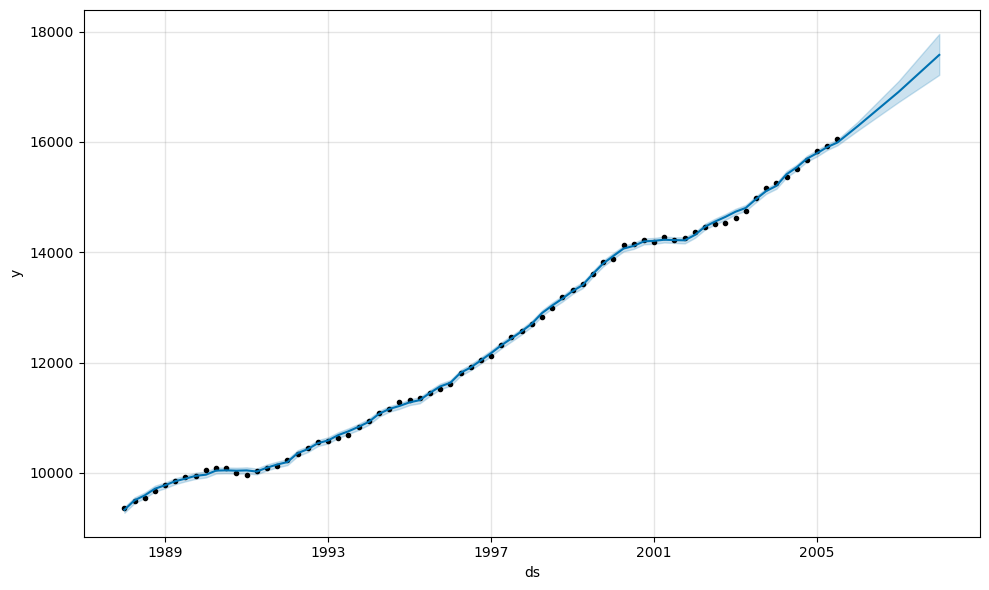

In [1400]:

#  Plot the Prophet predictions for the katrina trends data
#slice the forecast_katrina to dates only after 1995 for better presentation
model_katrina.plot(forecast_katrina)
forecast_katrina = forecast_katrina.loc[forecast_katrina['ds'] >= '1995']

c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain

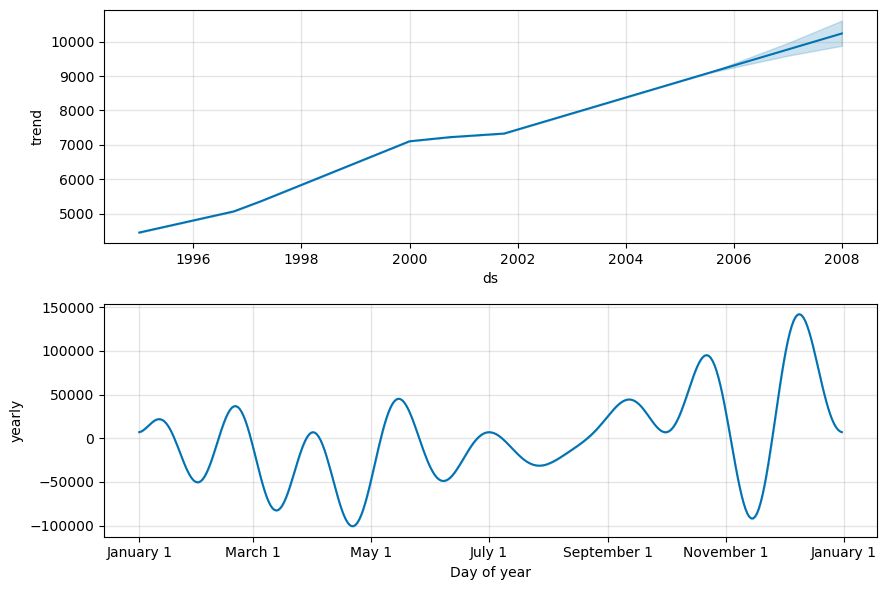

In [1401]:
# Use the plot_components function to visualize the forecast results
figure = model_katrina.plot_components(forecast_katrina)

<Axes: xlabel='ds'>

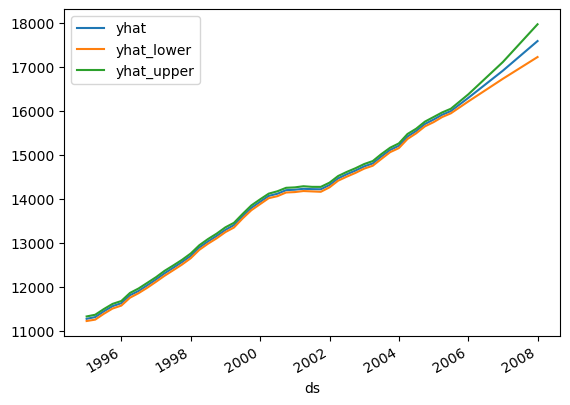

In [1402]:
# set 'ds' as index
# From the `forecast_katrina` DataFrame, plot to visualize
# the yhat, yhat_lower, and yhat_upper columns
forecast_katrina = forecast_katrina.set_index('ds')
forecast_katrina[['yhat', 'yhat_lower', 'yhat_upper']].plot()

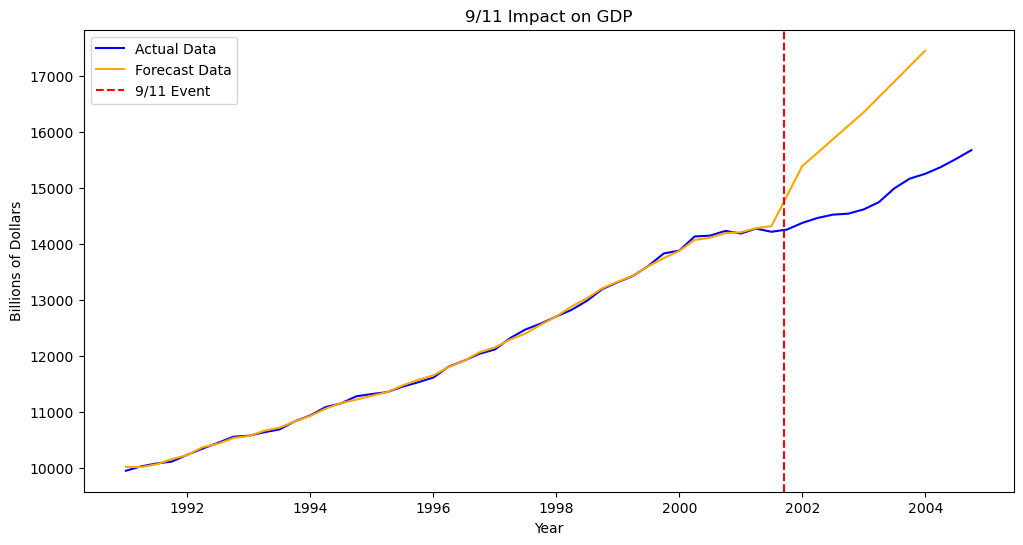

In [1403]:
# Create a figure with a specified size
plt.figure(figsize=(12, 6))


# create nine_eleven_actual_gdp_df which is the gdp_df sliced from 1992 to 2004
# plot nine_eleven_actual_gdp_df and the forecast in the same plot

nine_eleven_actual_gdp_df= gdp_df.loc['1991':'2004']
plt.plot(nine_eleven_actual_gdp_df.index, nine_eleven_actual_gdp_df['GDPC1'], label = 'Actual Data', color= 'blue')
plt.plot(forecast_9_11.index, forecast_9_11['yhat'], label= 'Forecast Data', color = 'orange')
plt.title('9/11 Impact on GDP')
plt.xlabel('Year')
plt.ylabel('Billions of Dollars')
# make the vertical event line for 2001-09-11

event_date = pd.to_datetime('2001-09-11')
plt.axvline(x=event_date, color='red', linestyle='--', label='9/11 Event')
plt.legend()
plt.show()


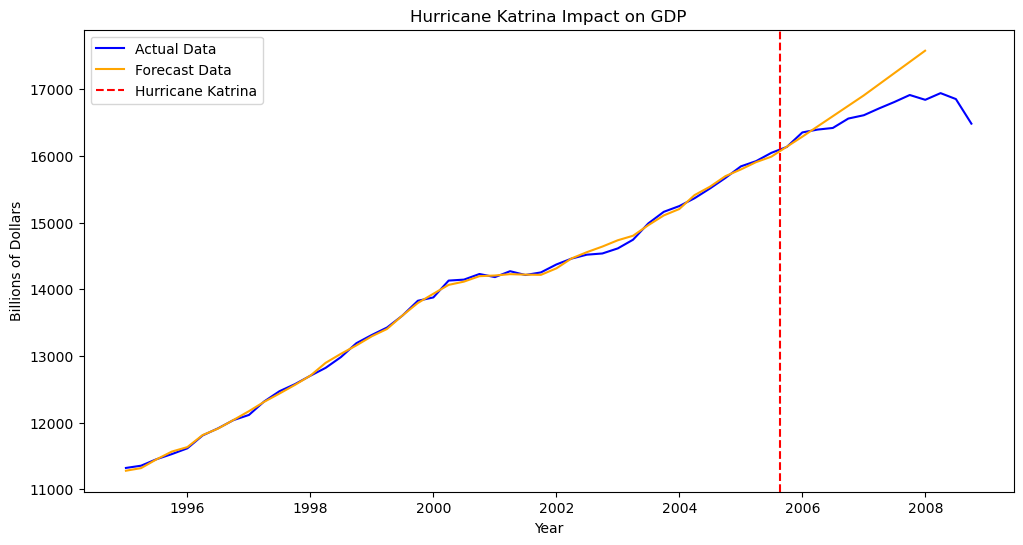

In [1404]:
# Create a figure with a specified size
plt.figure(figsize=(12, 6))

# create katrina_actual_gdp_df which is the gdp_df sliced from 1992 to 2008
# plot katrina_actual_gdp_df and the forecast in the same plot
# create a legend
katrina_actual_gdp_df= gdp_df.loc['1995':'2008']
plt.plot(katrina_actual_gdp_df.index, katrina_actual_gdp_df['GDPC1'], label = 'Actual Data', color= 'blue')
plt.plot(forecast_katrina.index, forecast_katrina['yhat'], label= 'Forecast Data', color= 'orange')
plt.title('Hurricane Katrina Impact on GDP')
plt.xlabel('Year')
plt.ylabel('Billions of Dollars')

# make the vertical event line for 2001-09-11
event_date = pd.to_datetime('2005-08-23')
plt.axvline(x=event_date, color='red', linestyle='--', label='Hurricane Katrina')

plt.legend()
plt.show()

In [1405]:
# export gdp_df as csv
# export forecast_9_11 as csv
# export forecast_katrina as csv
gdp_df.to_csv('resources/gdp_cleaned.csv')
forecast_9_11.to_csv('resources/forecast_9_11_gdp.csv')
forecast_katrina.to_csv('resources/forecast_katrina_gdp.csv')